In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
from count_spots import count_spots, find_substrate

In [42]:
_start = time.time()
bgr_img = cv2.imread('data/22-09-11_07h_dillué10x.JPG')
count, labels = count_spots(    bgr_img,
                                h_range=np.array((0.4,0.7)),
                                s_range=np.array((0.2,1)),
                                v_range=np.array((0.2,1)),
                                kernel=np.ones((2,2),np.uint8),
                                kernel_clean=np.ones((9,9),np.uint8)
                                )
print(f'time of operation : {round(time.time()-_start,2)} s')
print(f'The algorithm found {count} spots')

time of operation : 1.2 s
The algorithm found 31 spots


The algorithm found 31 spots


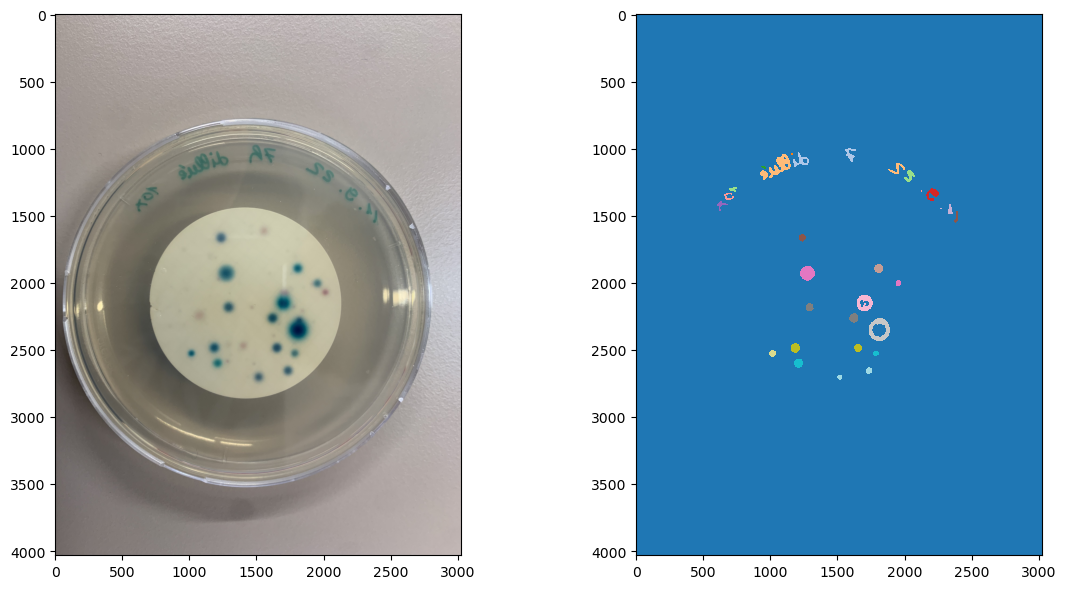

In [43]:
print(f'The algorithm found {count} spots')

rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB )

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(rgb_img)
ax[1].imshow(labels,cmap='tab20',interpolation='nearest')
fig.tight_layout()

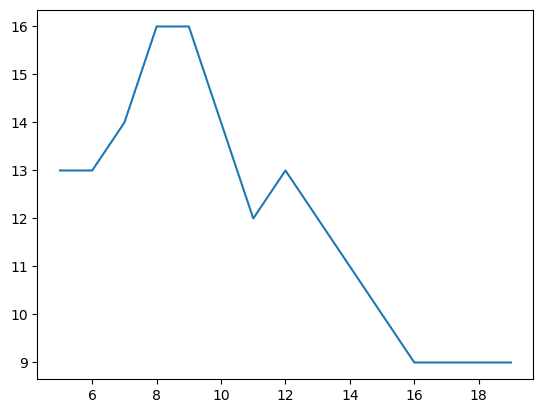

In [15]:
ks = list(range(5,20))
detections = [count_spots(bgr_img,kernel=np.ones((5,5),np.uint8),kernel_clean=np.ones((s,s),np.uint8))[0] for s in ks]
plt.plot(ks,detections)

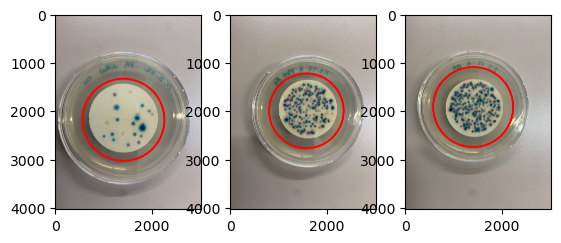

In [11]:
def test_find_substrate(filename,ax):
    bgr_img = cv2.imread(filename)
    x,y,r = find_substrate(bgr_img,maxRadius=3000)
    r=r*0.75
    output = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    cv2.circle(output, (int(x), int(y)), int(r), (255, 0, 0), 40)
    ax.imshow(output)

fig,ax = plt.subplots(1,3)
test_find_substrate('data/22-09-11_07h_dillué10x.JPG',ax[0])
test_find_substrate('data/22-09-07_07h.JPG',ax[1])
test_find_substrate('data/22-09-09_19h.JPG',ax[2])

In [44]:
def get_mask(x,y,r,ref):
    mask = np.zeros_like(ref)
    cv2.circle(mask, (int(x), int(y)), int(r), (1,1,1), -1)
    return np.array(mask).astype(np.float32)

The algorithm found 86 spots


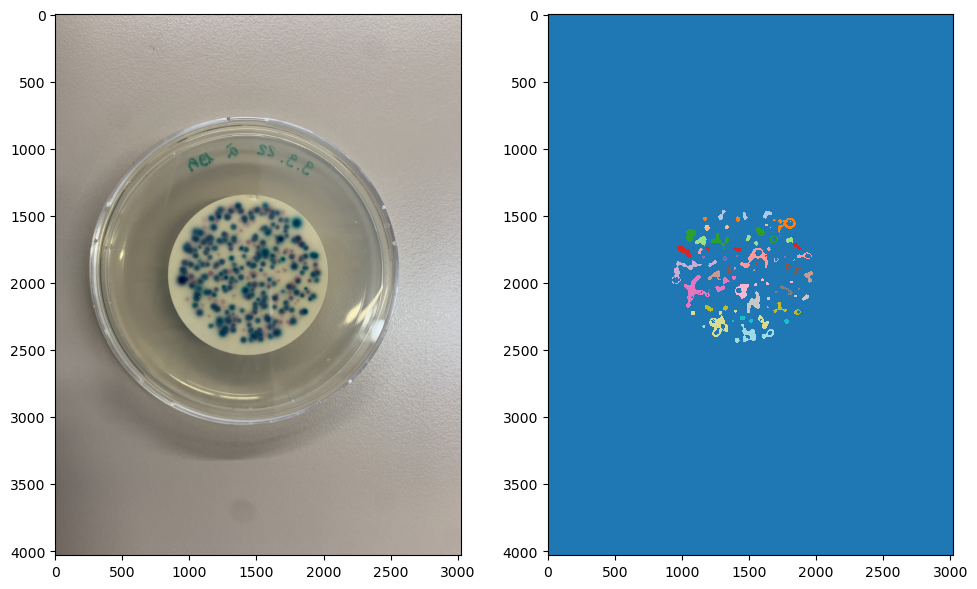

In [82]:
SCALE_RADIUS = 0.75
def process_sample(bgr_img):
    x,y,r = find_substrate(bgr_img,maxRadius=3000)
    r=r*SCALE_RADIUS
    mask = get_mask(x,y,r,bgr_img)
    masked_bgr = np.array(bgr_img * mask).astype(np.uint8)
    count, labels = count_spots(    masked_bgr,
                                    h_range=np.array((0.4,0.7)),
                                    s_range=np.array((0.2,1)),
                                    v_range=np.array((0.2,1)),
                                    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10)),
                                    kernel_clean=np.ones((2,2),np.uint8)
                                    )
    return count, labels

filename = 'data/22-09-09_19h.JPG'
bgr_img = cv2.imread(filename)
count, labels = process_sample(bgr_img)
print(f'The algorithm found {count} spots')
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB )
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(rgb_img)
ax[1].imshow(labels,cmap='tab20',interpolation='nearest')
fig.tight_layout()

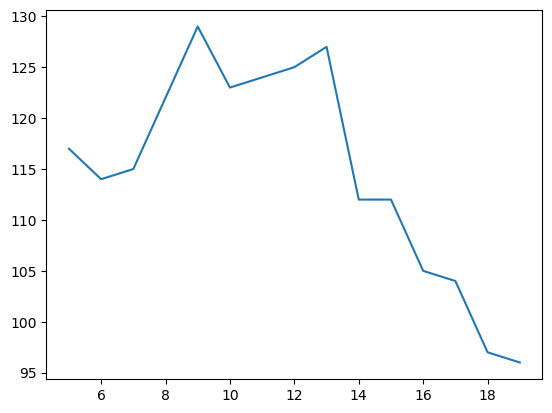

In [80]:
ks = list(range(5,20))
x,y,r = find_substrate(bgr_img,maxRadius=3000)
r=r*SCALE_RADIUS
mask = get_mask(x,y,r,bgr_img)
masked_bgr = np.array(bgr_img * mask).astype(np.uint8)
detections = [count_spots(masked_bgr,kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(s,s)),kernel_clean=np.ones((3,3),np.uint8))[0] for s in ks]
plt.plot(ks,detections)